<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">



<h1 align=center><font size = 5>Linear regression 1-D: Training Two Parameter Stochastic Gradient Descent (SGD)</font></h1> 

# Table of Contents
In this Lab, you will practice training a model by using Stochastic Gradient descent.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Make Some Data </a></li>
<li><a href="#ref1">Create the Model and Cost Function (total loss) </a></li>
<li><a href="#ref2">Train the Model:Batch Gradient Descent</a></li>
<li><a href="#ref3">Train the Model:Stochastic gradient descent</a></li>
<li><a href="#ref4">Train the Model:Stochastic gradient descent with Data Loader </a></li>

<li><a href="#ref5">Practice Questions</a></li>
<br>
<p></p>
Estimated Time Needed: <strong>30 min</strong>
</div>

<hr>

You'll need the following libraries:  

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with Pytorch. 

In [2]:
class plot_error_surfaces(object):
    def __init__(self,w_range, b_range,X,Y,n_samples=30,go=True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z=np.zeros((30,30))
        count1=0
        self.y=Y.numpy()
        self.x=X.numpy()
        for w1,b1 in zip(w,b):
            count2=0
            for w2,b2 in zip(w1,b1):
                Z[count1,count2]=np.mean((self.y-w2*self.x+b2)**2)
                count2 +=1
    
            count1 +=1
        self.Z=Z
        self.w=w
        self.b=b
        self.W=[]
        self.B=[]
        self.LOSS=[]
        self.n=0
        if go==True:
            plt.figure()
            plt.figure(figsize=(7.5,5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    def get_stuff(self,W,B,loss):
        self.n=self.n+1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
        
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c='r', marker='x',s=200,alpha=1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W,self.B,c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x,self.y,'ro',label="training points")
        plt.plot(self.x,self.W[-1]*self.x+self.B[-1],label="estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: '+str(self.n))
        plt.legend()
        plt.show()
        plt.subplot(122)
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W,self.B,c='r', marker='x')
        plt.title('Loss Surface Contour Iteration'+str(self.n) )
        plt.xlabel('w')
        plt.ylabel('b')
        plt.legend()

<a id="ref0"></a>
<h2 align=center>Make Some Data </h2>

Import Pytorch: 

In [3]:
import torch

Set random seed 

In [4]:
torch.manual_seed(1)

Generate values from -3 to 3 that create a line with a slope of 1 and a bias of -1. This is the line that you need to estimate. Add some noise to the data:

In [5]:
X=torch.arange(-3,3,0.1).view(-1, 1)
w=torch.tensor(-10.0,requires_grad=True)
f=-3*X+1
Y=f+0.1*torch.randn(X.size())

Plot the results:

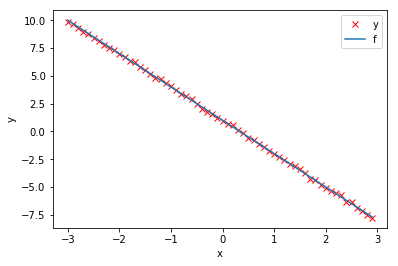

In [6]:
plt.plot(X.numpy(),Y.numpy(),'rx',label='y')
plt.plot(X.numpy(),f.numpy(),label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<a id="ref1"></a>
<h2 align=center>Create the Model and Cost Function (total loss) </h2>

Define the forward function: 

In [7]:
def forward(x):
    return w*x+b

Define the cost or criterion function: 

In [8]:
def criterion(yhat,y):
    
    return torch.mean((yhat-y)**2)

Create a </code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:

<Figure size 432x288 with 0 Axes>

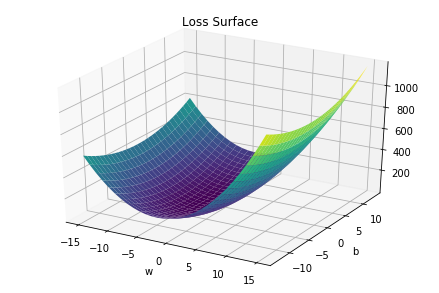

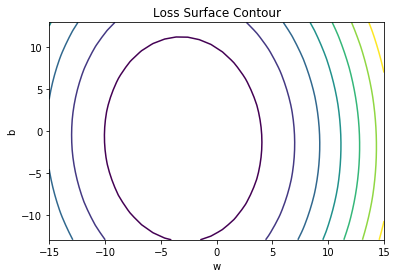

In [9]:
get_surface=plot_error_surfaces(15,13,X,Y,30)

<a id="ref2"></a>
<h2> Train the Model: Batch Gradient Descent</h2>

Create a model parameter by setting the argument <code>requires_grad<code> to True because the system must  learn it.

In [10]:
w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)

Run 10 epochs of batch gradient descent: **bug** data space is 1 iteration ahead of parameter space. 

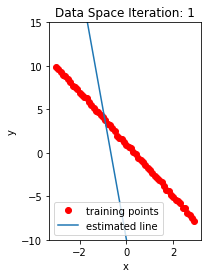

No handles with labels found to put in legend.


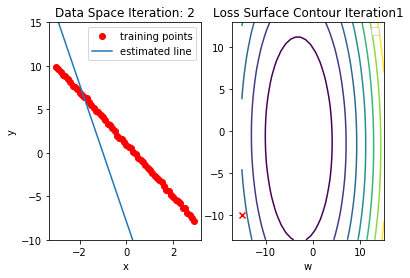

No handles with labels found to put in legend.


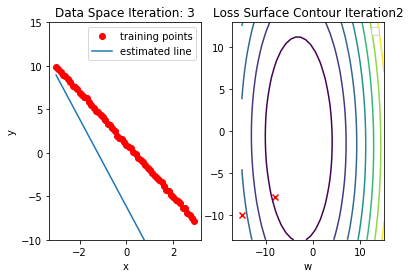

No handles with labels found to put in legend.


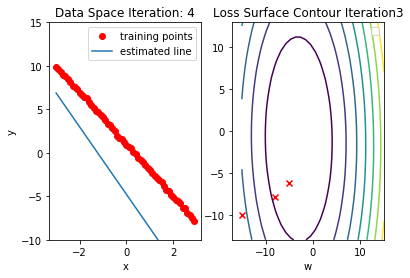

No handles with labels found to put in legend.


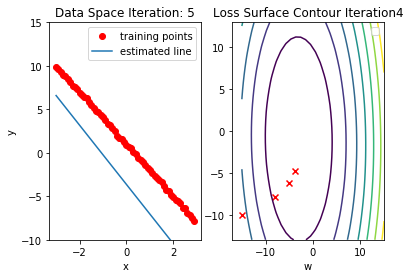

No handles with labels found to put in legend.


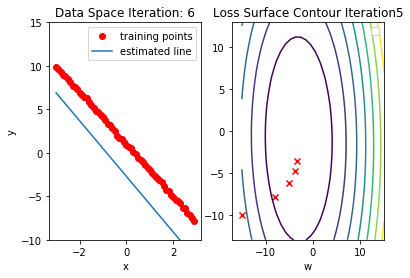

No handles with labels found to put in legend.


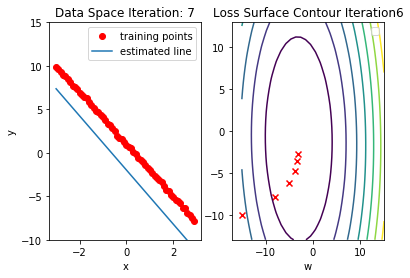

No handles with labels found to put in legend.


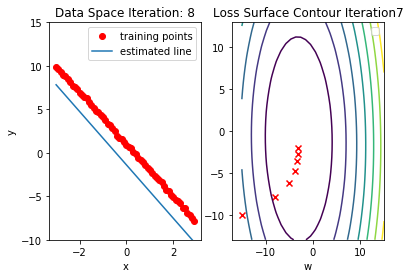

No handles with labels found to put in legend.


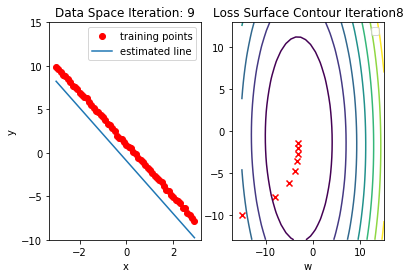

No handles with labels found to put in legend.


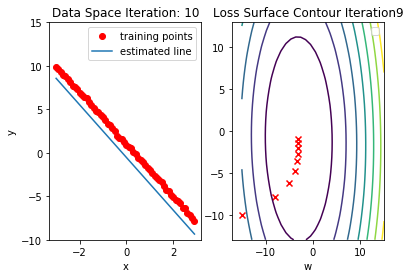

No handles with labels found to put in legend.


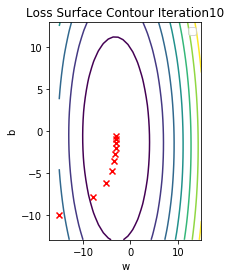

In [11]:
epochs=10
lr=0.1
LOSS=[]
for epoch in range(epochs):
    #make a prediction
    Yhat=forward(X)
    #calculate the loss
    loss=criterion(Yhat,Y)
    #store the total loss in a list 
    LOSS.append(loss)
    #just for ploting 
    #update state of plotting object 
    get_surface.get_stuff(w.data.tolist(),b.data.tolist(),loss.tolist())
    get_surface.plot_ps()
    #Backward pass: compute gradient of the loss with respect to all the learnable parameters
    loss.backward()
    #updata parameters slope
    w.data=w.data-lr*w.grad.data
    #updata parameters bias 
    b.data=b.data-lr*b.grad.data
    #clear gradients 
    w.grad.data.zero_()
    b.grad.data.zero_()

<a id="ref3"></a>
<h2> Train the Model: Stochastic Gradient Descent </h2>

Create a </code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:

In [12]:
get_surface=plot_error_surfaces(15,13,X,Y,30,go=False)

Run 10 epochs of stochastic gradient descent: **bug** data space is 1 iteration ahead of parameter space. 

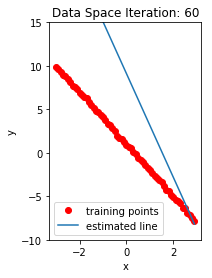

No handles with labels found to put in legend.


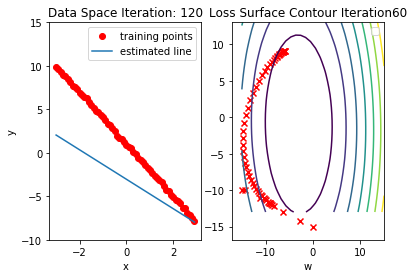

No handles with labels found to put in legend.


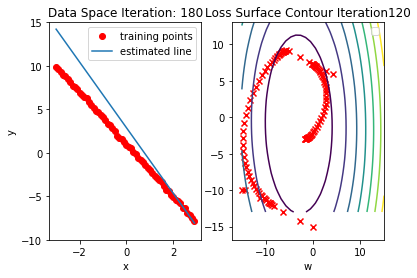

No handles with labels found to put in legend.


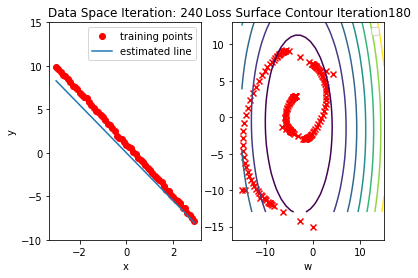

No handles with labels found to put in legend.


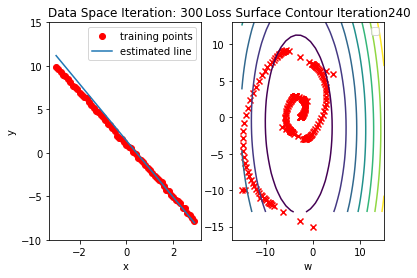

No handles with labels found to put in legend.


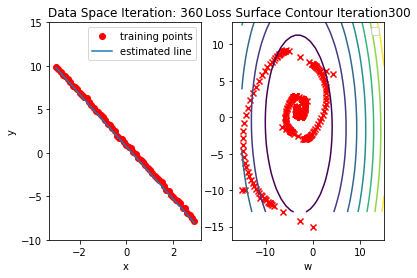

No handles with labels found to put in legend.


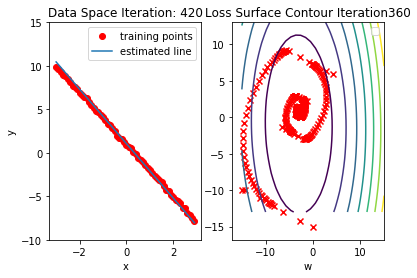

No handles with labels found to put in legend.


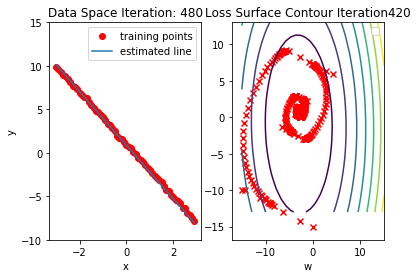

No handles with labels found to put in legend.


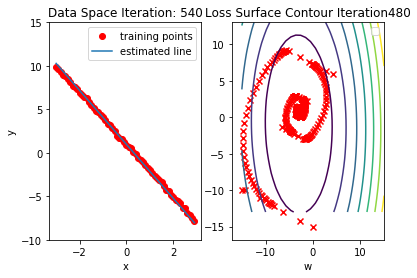

No handles with labels found to put in legend.


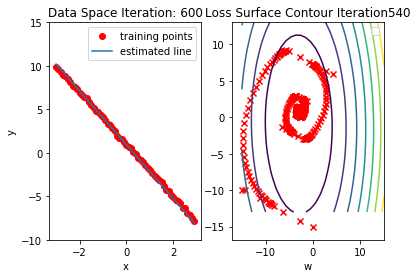

No handles with labels found to put in legend.


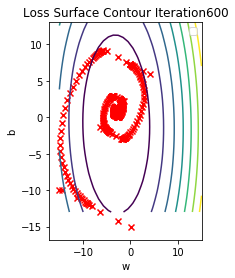

In [13]:
epochs=10
LOSS1=[]
w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)

for epoch in range(epochs):
     #SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
    Yhat=forward(X)
    #store the loss 
    LOSS1.append(criterion(Yhat,Y).tolist())
    #each iteration of the loop corresponds to one iteration of SGD
    for x,y in zip(X,Y):
        #make a prediction 
        yhat=forward(x)
        #calculate the loss 
        loss=criterion(yhat,y)
        #update state of plotting object not Pytroch 
        get_surface.get_stuff(w.data.tolist(),b.data.tolist(),loss.tolist())
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #updata parameters slope
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        #clear gradients 
        w.grad.data.zero_()
        b.grad.data.zero_()
    #plot surface and data space after each epoch    
    get_surface.plot_ps()

<a id="ref4"></a>
<h2> SGD with Dataset DataLoader</h2>

Import modules for building a dataset class: 

In [14]:
from torch.utils.data import Dataset, DataLoader

Create a dataset class:

In [15]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.arange(-3,3,0.1).view(-1, 1)
        self.y=-3*self.x+1
        self.len=self.x.shape[0]
    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

Create a dataset object:

In [16]:
dataset=Data()

Find the number of samples: 

In [17]:
len(dataset)

60

Obtain the first training point:  

In [18]:
x,y=dataset[0]
print("x=",x)
print("y=",y)

x= tensor([-3.])
y= tensor([10.])


Similarly, obtain the first three training points:  

In [19]:
x,y=dataset[0:3]
print(x)
print(y)

tensor([[-3.0000],
        [-2.9000],
        [-2.8000]])
tensor([[10.0000],
        [ 9.7000],
        [ 9.4000]])


Create a </code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:

In [20]:
get_surface=plot_error_surfaces(15,13,X,Y,30,go=False)

Create a DataLoader object by using the constructor: 

In [21]:
trainloader=DataLoader(dataset=dataset,batch_size=1)

Run 10 epochs of stochastic gradient descent: **bug** data space is 1 iteration ahead of parameter space. 

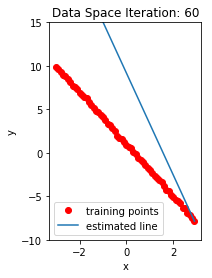

No handles with labels found to put in legend.


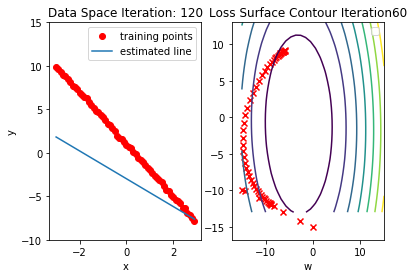

No handles with labels found to put in legend.


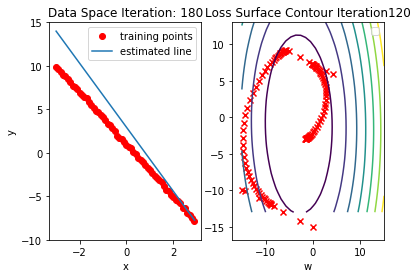

No handles with labels found to put in legend.


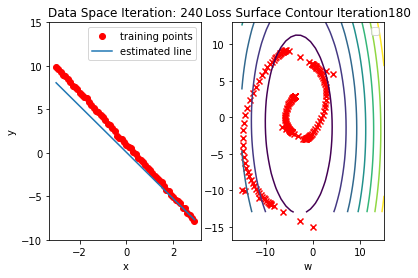

No handles with labels found to put in legend.


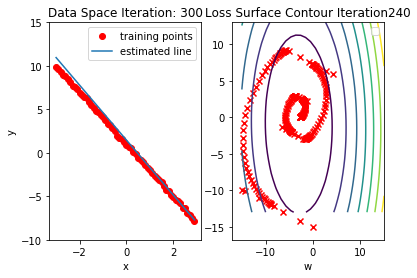

No handles with labels found to put in legend.


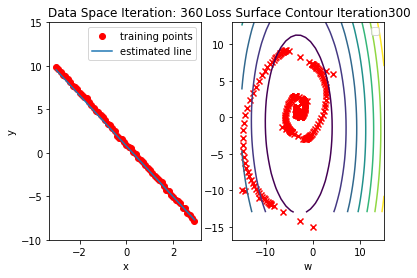

No handles with labels found to put in legend.


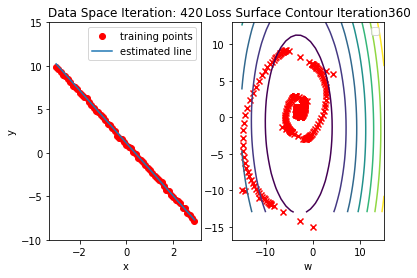

No handles with labels found to put in legend.


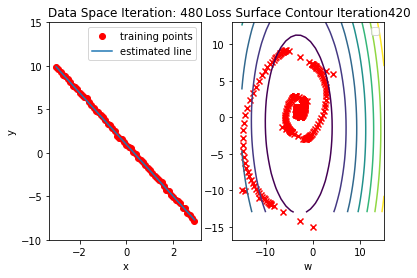

No handles with labels found to put in legend.


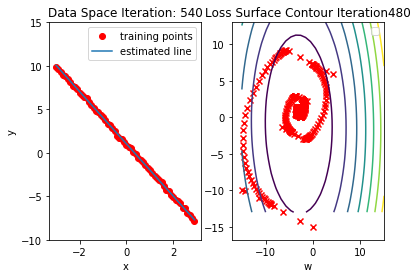

No handles with labels found to put in legend.


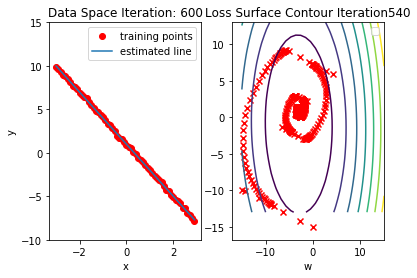

No handles with labels found to put in legend.


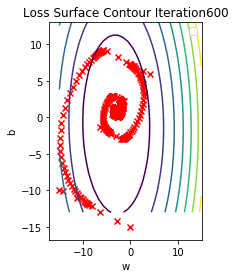

In [22]:
w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)

LOSS1=[]
for epoch in range(epochs):
    #SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
    #not nessry 
    Yhat=forward(X)
    #store the loss 
    LOSS1.append(criterion(Yhat,Y).tolist())
    #each iteration of the loop corresponds to one iteration of SGD
    for x,y in trainloader:
        #make a prediction
        yhat=forward(x)
         #calculate the loss     
        loss=criterion(yhat,y)
        #update state of plotting object not Pytroch 
        get_surface.get_stuff(w.data.tolist(),b.data.tolist(),loss.tolist())
         #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #updata parameters slope
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        #clear gradients 
        w.grad.data.zero_()
        b.grad.data.zero_()
    #plot surface and data space after each epoch    
    get_surface.plot_ps()

Compare the loss of both batch gradient decent as SGD. Note that SGD converges to a minimum faster, that is, it decreases faster. 

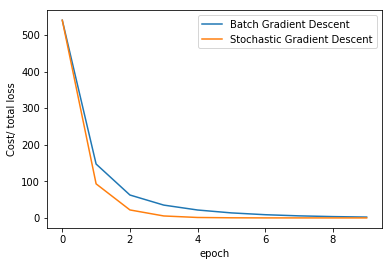

In [23]:
plt.plot(LOSS,label="Batch Gradient Descent")
plt.plot(LOSS1,label="Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

<a id="ref5"></a>
<h2 align=center>Practice Question </h2>

#### In the last section, you stored the total loss or cost in the list LOSS for each epoch. Write a script that stores the total loss or cost in a list for each iteration of SGD.

In [24]:
w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)

LOSS2=[]
for epoch in range(epochs):
    #SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
    #not nessry 
    Yhat=forward(X)
    #store the loss 
    #LOSS1.append(criterion(Yhat,Y).tolist())
    #each iteration of the loop corresponds to one iteration of SGD
    for x,y in trainloader:
        #make a prediction
        yhat=forward(x)
         #calculate the loss     
        loss=criterion(yhat,y)
        #update state of plotting object not Pytroch 
        get_surface.get_stuff(w.data.tolist(),b.data.tolist(),loss.tolist())
         #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #updata parameters slope
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        #clear gradients 
        w.grad.data.zero_()
        b.grad.data.zero_()
        LOSS2.append(criterion(Yhat,Y).tolist())


Double-click __here__ for the solution.

<!-- 
Your answer is below:
w=torch.tensor(-12.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)

LOSS=[]
for epoch in range(epochs):
    Yhat=forward(X)
    LOSS.append(criterion(Yhat,X))
    #each iteration of the loop corresponds to one iteration of SGD
    for x,y in trainloader:
        #make a prediction
        yhat=forward(x)
         #calculate the loss     
        loss=criterion(yhat,y)
        #LOSS.append(criterion(forward(X),Y))
      
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #updata parameters slope
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        #clear gradients 
        w.grad.data.zero_()
        b.grad.data.zero_()
-->


#### Plot the results 

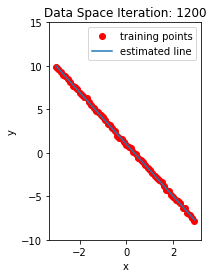

No handles with labels found to put in legend.


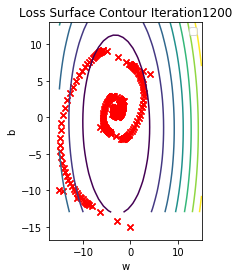

In [25]:
    #plot surface and data space after each epoch    
    get_surface.plot_ps()

Double-click __here__ for the solution.

<!-- 
plt.plot(LOSS,label="Stochastic Gradient Descent")
plt.xlabel('iteration')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()
-->

### About the Authors:  

 [Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/) ,Andrew Kin ,Alessandro Barboza